In [1]:
import AqEquil
ae = AqEquil.AqEquil()

In [2]:
# creating a new database called data0.cst from an OBIGT-style sheet
ae.create_data0(
    filename = "main_data.csv",
    supp_file = "data0_params.csv",
    supp_file_ss = "solid_solutions.csv",
    grid_temps=[0.01, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0],
    grid_press=[200, 200, 200, 200, 200, 200, 200, 200],
    suppress_redox = ['Fe'],
    db = "cst",
    exceed_Ttr = True,
    template_name="sample_template_cst.csv")

Error when the solid solution 'superserp': 'cronstedtite' was not found in the data file as a pure mineral. Skipping it...

Error when the solid solution 'brucite-ss': 'fe-brucite' was not found in the data file as a pure mineral. Skipping it...

Error when the solid solution 'talc-ss': 'minnesotaite' was not found in the data file as a pure mineral. Skipping it...



In [3]:
# speciation calculation using the newly-created data0.cst database
speciation = ae.speciate(input_filename="input_example_cst.csv",
                         exclude=["Year", "Area"],
                         db='cst',
                         custom_db=True,
                         report_filename="report_cst.csv",
                         delete_generated_folders=True)

Successfully created a data1.cst from data0.cst


Preprocessing done! Took 0.1 seconds.

Calling EQ3 on Crater.Hills.Geyser.3i using cst
Calling EQ3 on Gas.Crack.3i using cst
Calling EQ3 on Spray.Geyser.Source.3i using cst
Calling EQ3 on Bison.Pool.3i using cst
Calling EQ3 on Snail.3i using cst
Calling EQ3 on Ambergris.3i using cst
Calling EQ3 on MLS.Source.3i using cst
Now processing EQ3 output files...

Processing EQ3 output for Ambergris

Processing EQ3 output for Bison Pool

Processing EQ3 output for Crater Hills Geyser

Processing EQ3 output for Gas Crack

Processing EQ3 output for MLS Source

Processing EQ3 output for Snail

Processing EQ3 output for Spray Geyser Source

Finished processing EQ3 output files...

Now processing mass contribution data...

Processing mass contribution of basis species in Ambergris...

Processing mass contribution of basis species in Bison Pool...

Processing mass contribution of basis species in Crater Hills Geyser...

Processing mass contribution of

In [4]:
speciation.report

Sample,Year,Area,pH,Temperature,HCO3-_(input),O2_(input),HS-_(input),SiO2_(input),METHANE_(input),H2_(input),...,O2/H2O,%CI of mean,%CI of total,Charge imbalance,IS (molal),Mean charge,Sigma(mz) anions,Sigma(mz) cations,Total charge,stoichiometric IS (molal)
,,,pH,degC,Molality,Molality,Molality,Molality,Molality,Molality,...,Eh_volts,%,%,eq/kg.H2O,molality,eq/kg.H2O,eq/kg.H2O,eq/kg.H2O,eq/kg.H2O,molality
Bison Pool,2014,YNP,7.640,92.2,0.005690,0.000009,0.000003,0.006270,0.000000e+00,0.000000e+00,...,0.584,-0.7993,-0.3996,-0.000111,0.014041,0.013843,-0.013898,0.013788,0.027686,0.014116
Spray Geyser Source,2012,YNP,8.021,92.9,0.005410,0.000003,0.000004,0.005030,0.000000e+00,0.000000e+00,...,0.546,-0.7566,-0.3783,-0.000097,0.013065,0.012798,-0.012847,0.012750,0.025596,0.013131
Crater Hills Geyser,2012,YNP,3.327,89.0,0.000117,0.000000,0.000017,0.014400,0.000000e+00,0.000000e+00,...,NaN,1.8615,0.9308,0.000622,0.037746,0.033410,-0.033099,0.033721,0.066820,0.041994
Ambergris,2011,Iceland,8.452,81.5,0.000983,0.000053,0.000030,0.002480,8.900000e-09,3.970000e-08,...,0.565,17.9077,8.9539,0.000725,0.004791,0.004051,-0.003688,0.004413,0.008101,0.004919
MLS Source,2007,YNP,7.850,94.0,0.006785,0.000007,0.000002,0.004200,0.000000e+00,0.000000e+00,...,0.562,0.6161,0.3080,0.000111,0.018480,0.018063,-0.018008,0.018119,0.036126,0.018583
Gas Crack,2014,Oman,11.670,32.2,0.000033,0.000034,0.000006,0.000001,1.750000e-05,2.261290e-04,...,0.492,1.0183,0.5091,0.000222,0.023990,0.021828,-0.021717,0.021939,0.043656,0.024548
Snail,2014,Oman,11.650,23.8,0.000042,0.000009,0.000007,0.000010,1.371360e-04,2.471160e-04,...,0.510,0.9361,0.4680,0.000086,0.010842,0.009216,-0.009173,0.009259,0.018433,0.011058


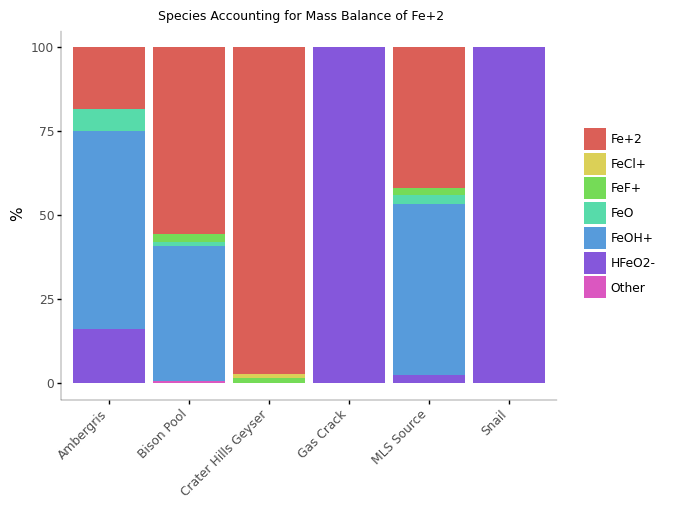

<ggplot: (8726564601678)>

In [8]:
# visualize basis species contributions to aqueous species by mass.
speciation.plot_mass_contribution("Fe+2")